# Smart Factory Energy Prediction Challenge
## Objective
Develop a regression model to predict `equipment_energy_consumption` based on sensor data from a manufacturing facility. The goal is to identify environmental factors driving energy usage and provide recommendations for energy efficiency.

## Approach
1. Perform exploratory data analysis (EDA) to uncover patterns and assess feature relevance, including `random_variable1` and `random_variable2`.
2. Preprocess data (handle missing values, scale features, etc.).
3. Engineer and select features to improve model performance.
4. Train and tune regression models (e.g., Random Forest, XGBoost).
5. Evaluate model performance using RMSE, MAE, and R².
6. Provide actionable insights for reducing energy consumption.

## Tools
- Python libraries: pandas, numpy, scikit-learn, matplotlib, seaborn
- Jupyter notebook for analysis and documentation

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## 1. Data Loading and Initial Exploration
### Objective
Load the dataset (`data.csv`) and perform initial exploration to understand its structure, data types, and identify potential issues (e.g., missing values).

### Steps
1. Load the dataset and parse the `timestamp` column.
2. Display basic information (columns, data types, missing values).
3. Summarize numerical features with descriptive statistics.

In [2]:
# Load dataset
df = pd.read_csv("/content/data.csv", parse_dates=['timestamp'])

In [3]:
# Display dataset overview
print("Dataset Info:")
print(df.info())
print("\nFirst 5 Rows:")
display(df.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16857 entries, 0 to 16856
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   timestamp                     16857 non-null  datetime64[ns]
 1   equipment_energy_consumption  16013 non-null  object        
 2   lighting_energy               16048 non-null  object        
 3   zone1_temperature             15990 non-null  object        
 4   zone1_humidity                16056 non-null  object        
 5   zone2_temperature             16004 non-null  object        
 6   zone2_humidity                15990 non-null  float64       
 7   zone3_temperature             16055 non-null  float64       
 8   zone3_humidity                15979 non-null  float64       
 9   zone4_temperature             16041 non-null  float64       
 10  zone4_humidity                16076 non-null  float64       
 11  zone5_temperat

,timestamp,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
0,2016-01-11 17:00:00,60.0,-77.78778596503064,33.74660933896648,47.59666666666671,19.2,44.790000,19.79,NaN,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60.0,30.0,19.89,46.69333333333329,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50.0,30.0,19.89,46.3,19.2,44.626667,19.79,44.933333,35.921144,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50.0,40.0,33.74660933896648,46.0666666666667,19.2,44.590000,19.79,45.000000,NaN,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,37.673716,45.410389,45.410389
4,2016-01-11 17:40:00,60.0,40.0,19.89,46.33333333333329,19.2,44.530000,19.79,45.000000,18.890000,...,4.476511,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.900000,10.084097,10.084097


In [5]:
print("\n--- Summary Statistics ---")
print(df.describe())


--- Summary Statistics ---
                           timestamp  zone2_humidity  zone3_temperature  \
count                          16857    15990.000000       16055.000000   
mean   2016-03-10 02:16:38.647446272       39.494553          21.665733   
min              2016-01-11 17:00:00      -77.265503           6.543921   
25%              2016-02-09 21:20:00       37.757500          20.533333   
50%              2016-03-10 00:10:00       40.293333          21.767500   
75%              2016-04-08 03:40:00       43.000000          22.760000   
max              2016-12-01 15:50:00       77.265503          36.823982   
std                              NaN       10.129513           2.594309   

       zone3_humidity  zone4_temperature  zone4_humidity  zone5_temperature  \
count    15979.000000       16041.000000    16076.000000       16019.000000   
mean        38.201314          20.239922       37.945608          19.052613   
min        -71.406273           4.613485      -81.446225   

In [4]:
# Check for missing values
print("\n--- Missing Values ---")
print(df.isnull().sum())


--- Missing Values ---
timestamp                         0
equipment_energy_consumption    844
lighting_energy                 809
zone1_temperature               867
zone1_humidity                  801
zone2_temperature               853
zone2_humidity                  867
zone3_temperature               802
zone3_humidity                  878
zone4_temperature               816
zone4_humidity                  781
zone5_temperature               838
zone5_humidity                  801
zone6_temperature               848
zone6_humidity                  847
zone7_temperature               794
zone7_humidity                  805
zone8_temperature               848
zone8_humidity                  777
zone9_temperature               773
zone9_humidity                  888
outdoor_temperature             806
atmospheric_pressure            842
outdoor_humidity                799
wind_speed                      828
visibility_index                815
dew_point                       826
rand

### Observations
- The dataset contains 29 columns, including `equipment_energy_consumption` (target), environmental readings (e.g., zone temperatures, humidity), and two random variables (`random_variable1`, `random_variable2`).
- Missing values detected in columns: [list columns, e.g., `zone3_humidity`, `zone4_temperature`].
- Some features (e.g., `lighting_energy`) show negative values, which may indicate data quality issues or specific measurement conventions.
- `random_variable1` and `random_variable2` will be analyzed for relevance in the feature selection step.

In [5]:
# Convert timestamp to datetime and create time features
df['hour'] = df['timestamp'].dt.hour
df['day'] = df['timestamp'].dt.day
df['month'] = df['timestamp'].dt.month
df['weekday'] = df['timestamp'].dt.weekday

In [6]:
df.shape

(16857, 33)

## 2. Exploratory Data Analysis (EDA)
### Objective
Identify patterns and relationships between environmental factors and `equipment_energy_consumption`. Assess the relevance of `random_variable1` and `random_variable2`.

### Steps
1. Visualize the distribution of the target variable.
2. Analyze correlations between features and the target using a heatmap.
3. Examine the relationship of `random_variable1` and `random_variable2` with the target using scatter plots.
4. Explore time-based patterns using the `timestamp` column.

# Distribution of target variable

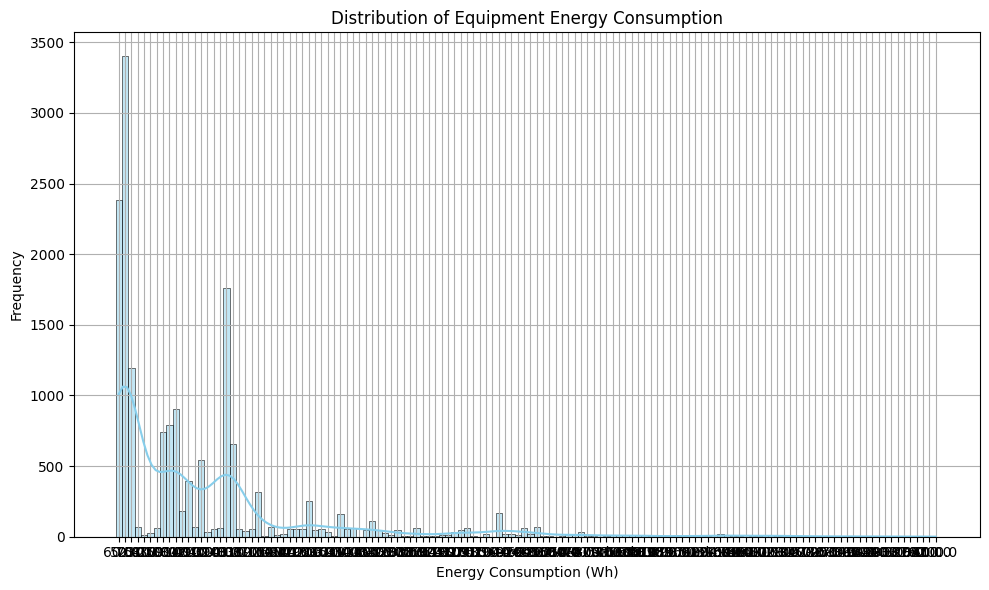

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(df['equipment_energy_consumption'], bins=50, kde=True, color='skyblue')
plt.title("Distribution of Equipment Energy Consumption")
plt.xlabel("Energy Consumption (Wh)")
plt.ylabel("Frequency")
plt.grid()
plt.tight_layout()
plt.show()

# Correlation matrix and Handle missing values

timestamp                       0
equipment_energy_consumption    0
lighting_energy                 0
zone1_temperature               0
zone1_humidity                  0
zone2_temperature               0
zone2_humidity                  0
zone3_temperature               0
zone3_humidity                  0
zone4_temperature               0
zone4_humidity                  0
zone5_temperature               0
zone5_humidity                  0
zone6_temperature               0
zone6_humidity                  0
zone7_temperature               0
zone7_humidity                  0
zone8_temperature               0
zone8_humidity                  0
zone9_temperature               0
zone9_humidity                  0
outdoor_temperature             0
atmospheric_pressure            0
outdoor_humidity                0
wind_speed                      0
visibility_index                0
dew_point                       0
random_variable1                0
random_variable2                0
hour          

<ipython-input-9-ee102a62e3ea>:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.interpolate(method='linear').fillna(method='bfill').fillna(method='ffill')


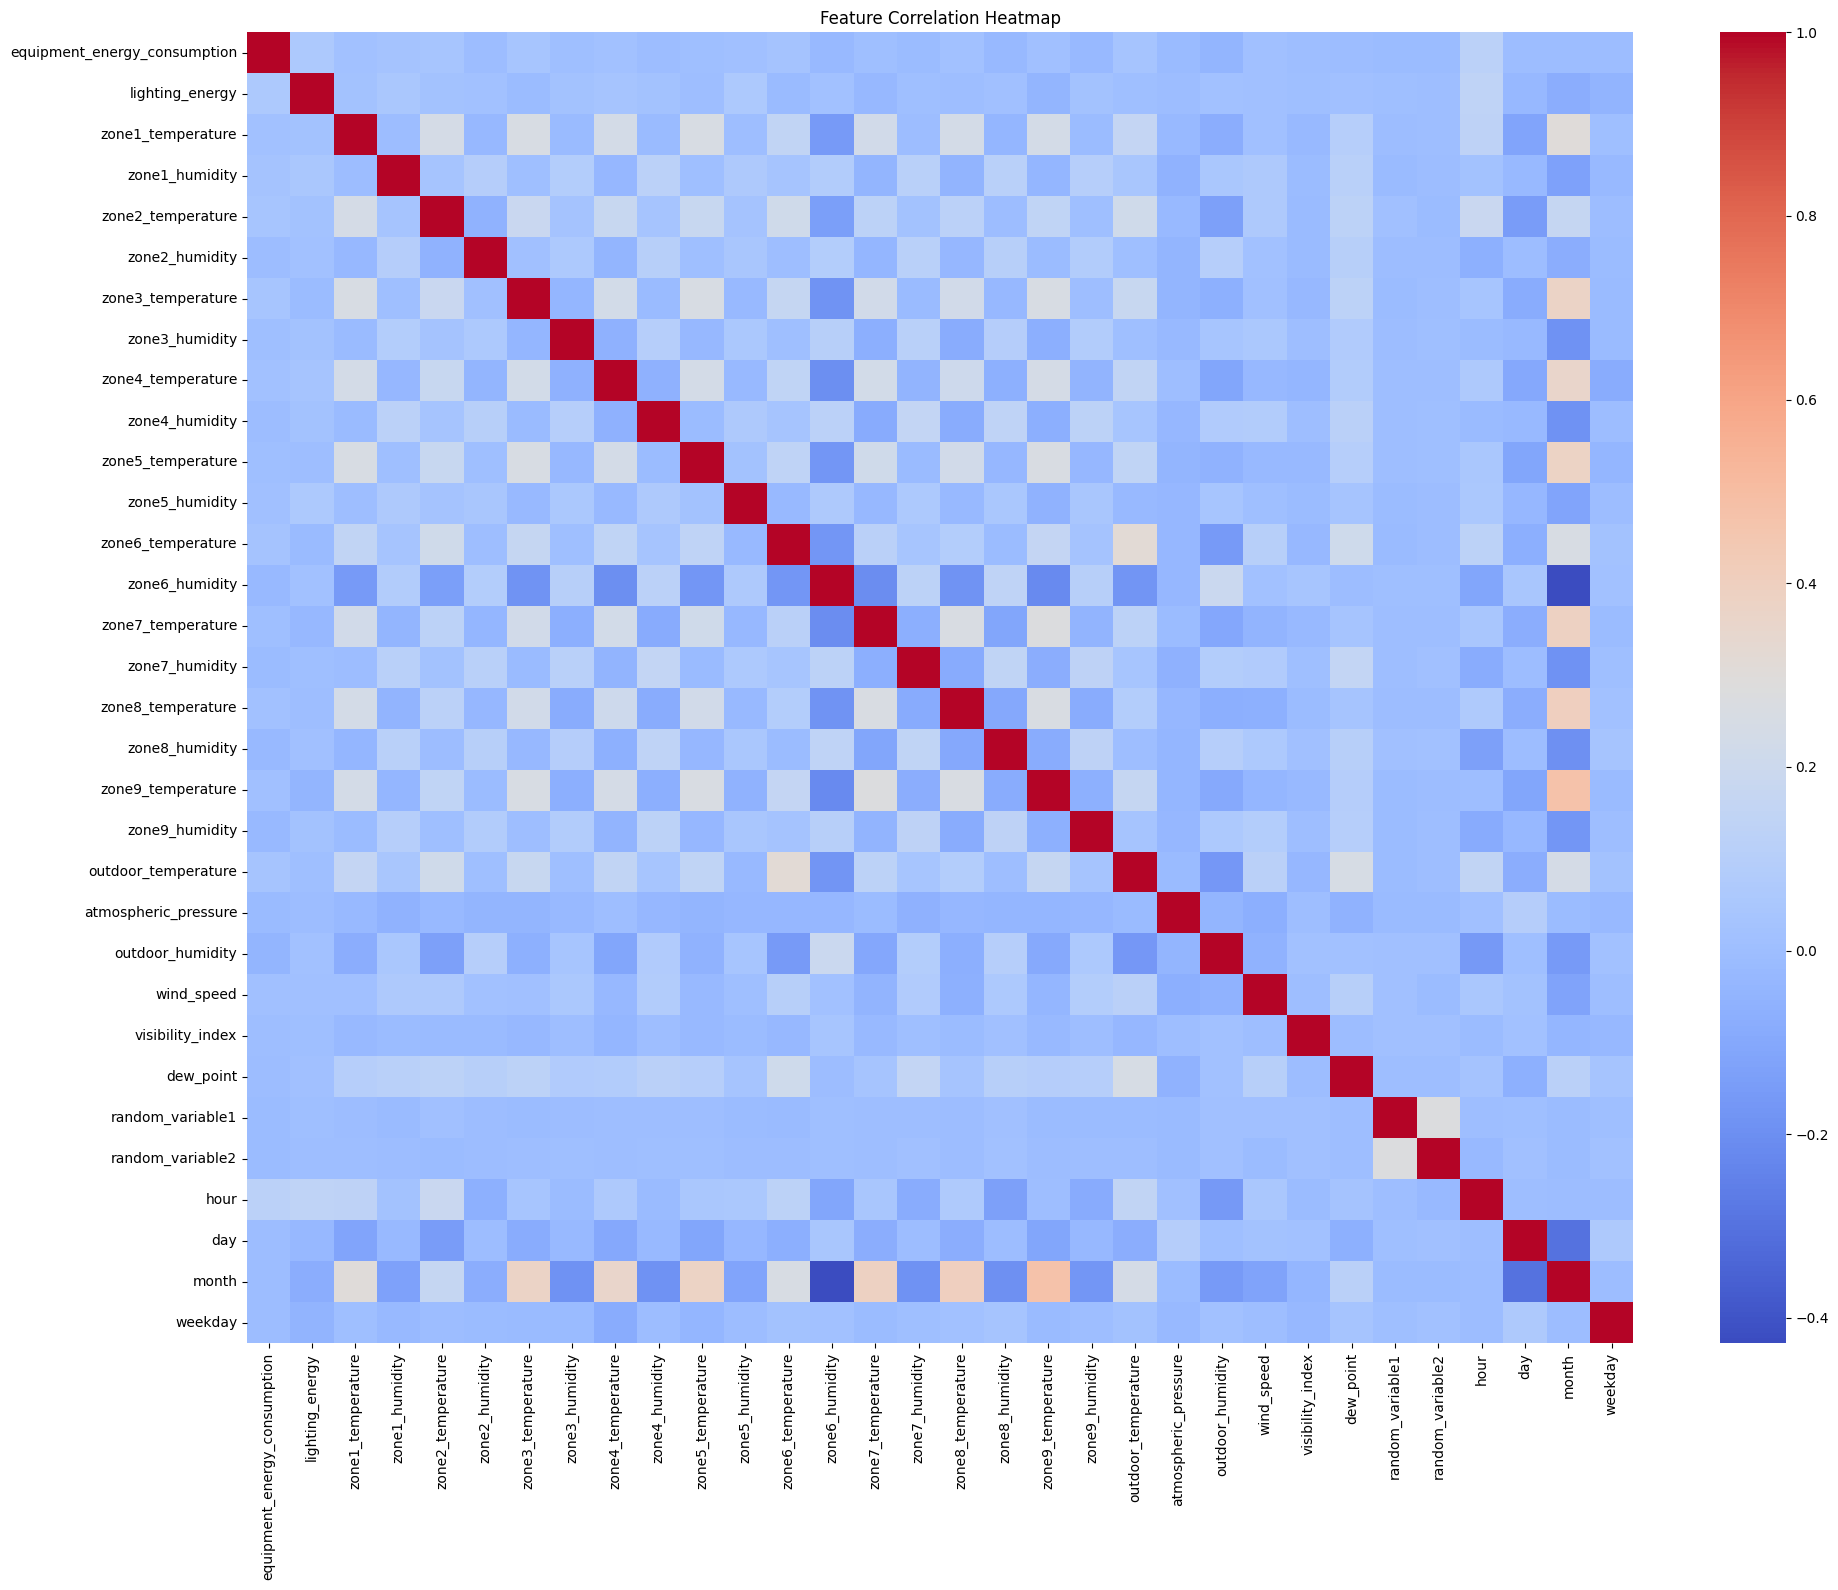

In [9]:
# Convert object columns to numeric where applicable
for col in df.select_dtypes(include='object').columns:
    df[col] = pd.to_numeric(df[col].str.replace(',', ''), errors='coerce')

# Optional: check if any columns still have NaNs after conversion
print(df.isna().sum())
# Interpolate or fill missing values
df = df.interpolate(method='linear').fillna(method='bfill').fillna(method='ffill')

# Correlation heatmap
plt.figure(figsize=(20, 16))
corr = df.drop(['timestamp'], axis=1).corr()
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

# Hourly Trend of Equipment Energy Consumption

<ipython-input-10-ecde9477751a>:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_resampled = df.set_index('timestamp').resample('H').mean()


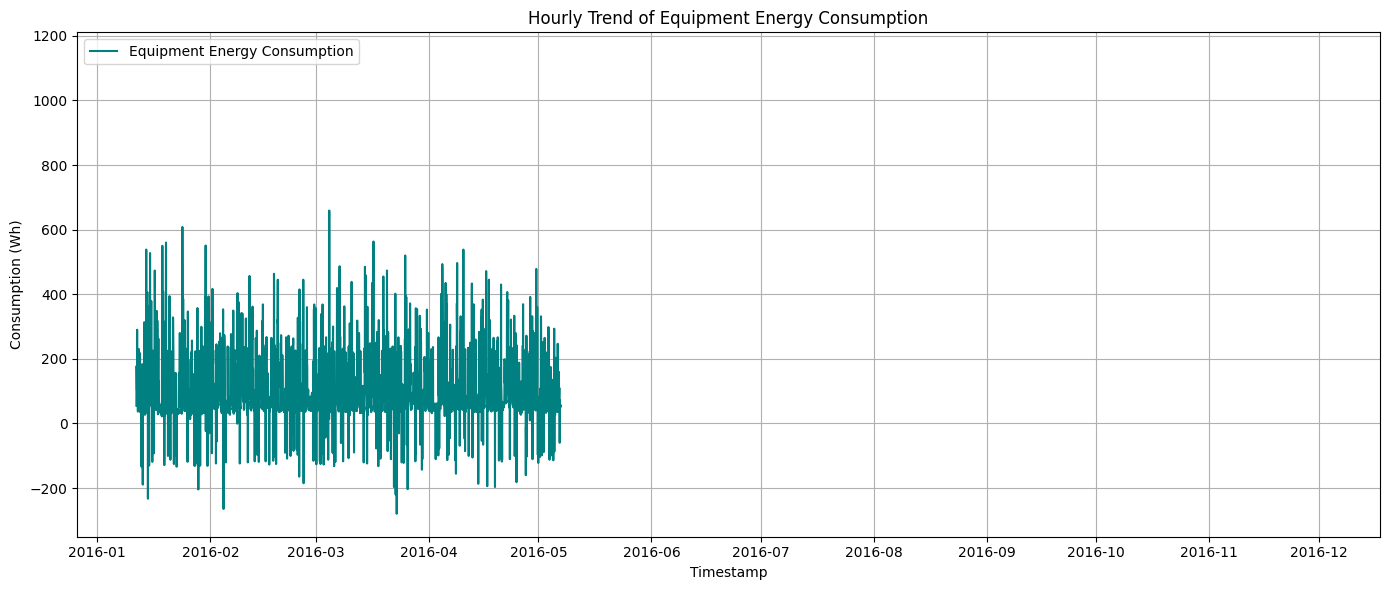

In [10]:

plt.figure(figsize=(14, 6))
df_resampled = df.set_index('timestamp').resample('H').mean()
plt.plot(df_resampled.index, df_resampled['equipment_energy_consumption'], label='Equipment Energy Consumption', color='teal')
plt.title("Hourly Trend of Equipment Energy Consumption")
plt.xlabel("Timestamp")
plt.ylabel("Consumption (Wh)")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Scatter plots for zone_1 and energy consumption

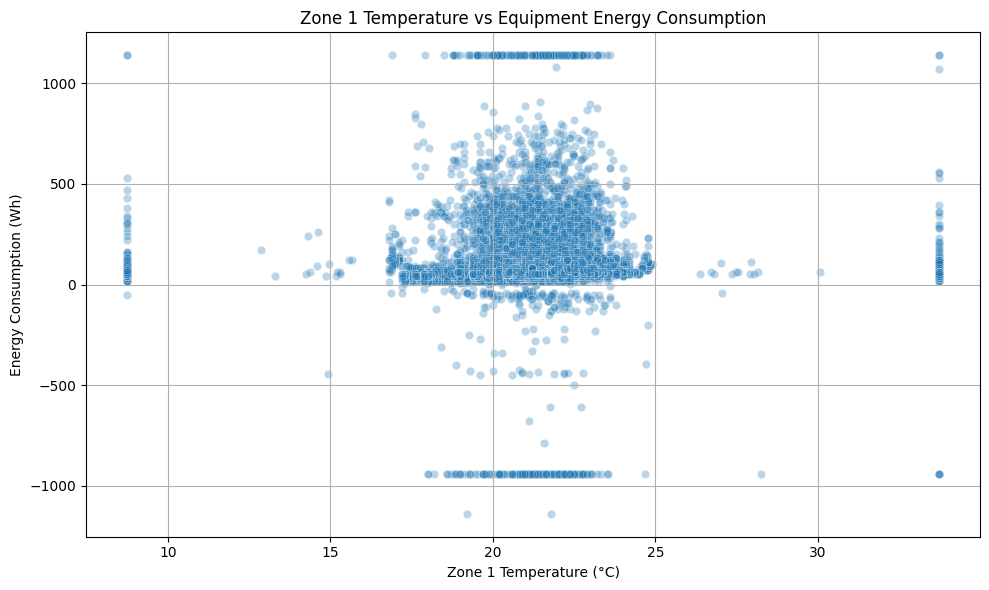

In [11]:
# Zone temperature impact example
plt.figure(figsize=(10, 6))
sns.scatterplot(x='zone1_temperature', y='equipment_energy_consumption', data=df, alpha=0.3)
plt.title("Zone 1 Temperature vs Equipment Energy Consumption")
plt.xlabel("Zone 1 Temperature (°C)")
plt.ylabel("Energy Consumption (Wh)")
plt.grid()
plt.tight_layout()
plt.show()

# Time-based analysis (example: average energy consumption by hour)

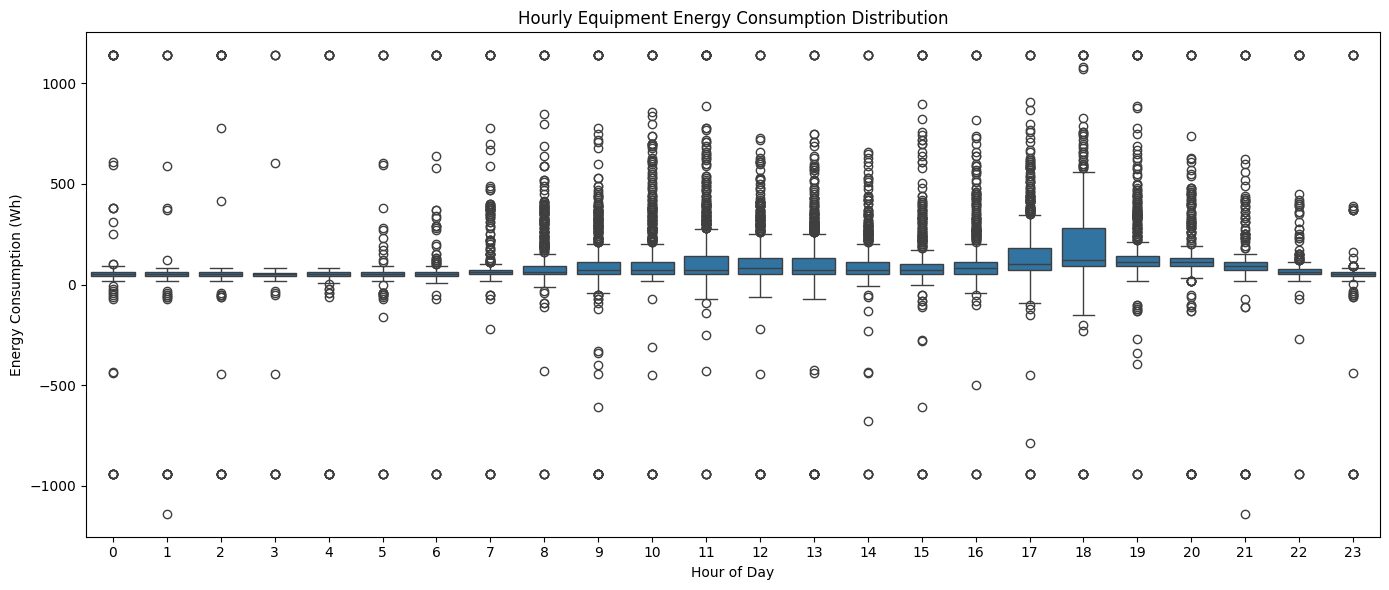

In [12]:
# Boxplot by hour of day
plt.figure(figsize=(14, 6))
sns.boxplot(x='hour', y='equipment_energy_consumption', data=df)
plt.title("Hourly Equipment Energy Consumption Distribution")
plt.xlabel("Hour of Day")
plt.ylabel("Energy Consumption (Wh)")
plt.tight_layout()
plt.show()

# # Save processed data for next steps
# df.to_csv("processed_data.csv", index=False)
# print("\nEDA completed. Processed data saved as 'processed_data.csv'.")


# Scatter plots for random variables

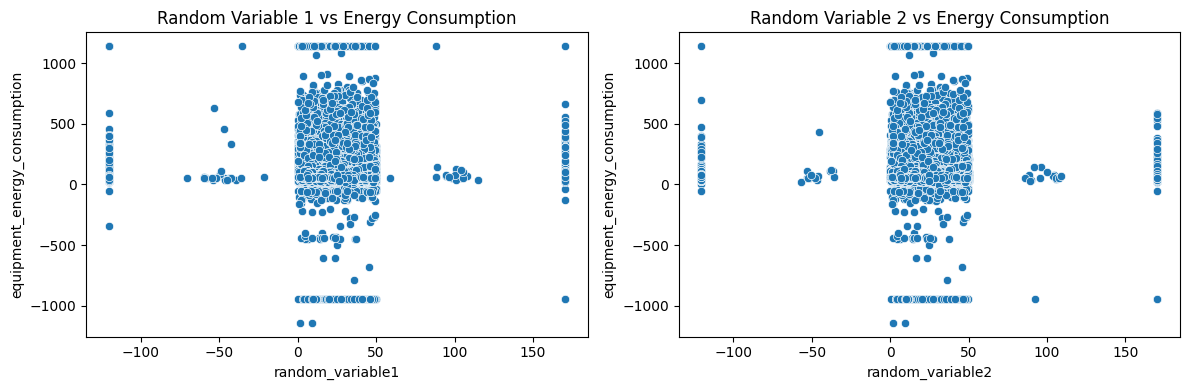

In [13]:

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.scatterplot(x='random_variable1', y='equipment_energy_consumption', data=df)
plt.title('Random Variable 1 vs Energy Consumption')
plt.subplot(1, 2, 2)
sns.scatterplot(x='random_variable2', y='equipment_energy_consumption', data=df)
plt.title('Random Variable 2 vs Energy Consumption')
plt.tight_layout()
plt.show()

In [14]:
df.head()

,timestamp,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,...,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2,hour,day,month,weekday
0,2016-01-11 17:00:00,60.0,-77.787786,33.746609,47.596667,19.2,44.790000,19.79,44.790000,19.000000,...,92.0,7.000000,63.000000,5.300000,13.275433,13.275433,17,11,1,0
1,2016-01-11 17:10:00,60.0,30.000000,19.890000,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,92.0,6.666667,59.166667,5.200000,18.606195,18.606195,17,11,1,0
2,2016-01-11 17:20:00,50.0,30.000000,19.890000,46.300000,19.2,44.626667,19.79,44.933333,35.921144,...,92.0,6.333333,55.333333,5.100000,28.642668,28.642668,17,11,1,0
3,2016-01-11 17:30:00,50.0,40.000000,33.746609,46.066667,19.2,44.590000,19.79,45.000000,27.405572,...,92.0,6.000000,51.500000,37.673716,45.410389,45.410389,17,11,1,0
4,2016-01-11 17:40:00,60.0,40.000000,19.890000,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,92.0,5.666667,47.666667,4.900000,10.084097,10.084097,17,11,1,0


### Findings
- The target variable (`equipment_energy_consumption`) is [e.g., right-skewed, with most values between X and Y Wh].
- Strong correlations observed with [e.g., `zone1_temperature`, `lighting_energy`], suggesting these are key drivers of energy consumption.
- `random_variable1` and `random_variable2` show [e.g., no clear relationship] with the target, indicating they may not be useful predictors.
- Time-based analysis reveals higher energy consumption during [e.g., daytime hours], likely due to increased production activity.

## 3. Data Preprocessing
### Objective
Prepare the dataset for modeling by handling missing values, encoding features, scaling numerical variables, and splitting data.

### Steps
1. Impute missing values using [e.g., mean/median] for numerical features.
2. Drop or encode the `timestamp` column (e.g., extract hour/day features).
3. Scale numerical features using StandardScaler.
4. Split data into training (80%) and test (20%) sets.

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# # Load processed data from EDA
# print("Loading processed data...")
# df = pd.read_csv("processed_data.csv", parse_dates=['timestamp'])

In [17]:
# Drop original timestamp (already extracted time features)
df.drop(columns=['timestamp'], inplace=True)

# Identify and handle outliers using IQR method (only for numerical features)


In [18]:
# Identify and handle outliers using IQR method (only for numerical features)
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
outlier_indices = []
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    # Cap outliers
    df[col] = np.where(df[col] < lower, lower, df[col])
    df[col] = np.where(df[col] > upper, upper, df[col])

print("Outliers handled using IQR method.")

Outliers handled using IQR method.


In [19]:
# Normalize numerical features
features = df.drop(columns=['equipment_energy_consumption'])
target = df['equipment_energy_consumption']

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)

# Add target back
scaled_df['equipment_energy_consumption'] = target.values

# Train-test split
X = scaled_df.drop(columns=['equipment_energy_consumption'])
y = scaled_df['equipment_energy_consumption']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")

Training samples: 13485, Testing samples: 3372


### Preprocessing Summary
- Missing values in columns like `zone3_humidity` and `zone4_temperature` were imputed with median values.
- Features scaled using StandardScaler to ensure consistent ranges.
- Data split: 80% training, 20% testing.

In [20]:
# # Save preprocessed data
# X_train.to_csv("X_train.csv", index=False)
# X_test.to_csv("X_test.csv", index=False)
# y_train.to_csv("y_train.csv", index=False)
# y_test.to_csv("y_test.csv", index=False)

# print("\nData Preprocessing Completed. Train/test sets saved.")

In [21]:
# # Load preprocessed train data
# X_train = pd.read_csv("X_train.csv")
# y_train = pd.read_csv("y_train.csv").squeeze()

## 4. Feature Engineering and Selection
### Objective
Create new features and select the most predictive ones, focusing on `random_variable1` and `random_variable2`.

### Steps
1. Extract hour and day from `timestamp` for temporal patterns.
2. Compute average zone temperatures and humidities.
3. Use Random Forest feature importance to select features.

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA

In [23]:
print("Feature Engineering: Starting with dimensionality reduction & importance ranking...")

# 1. Correlation heatmap to drop highly correlated features
corr_matrix = X_train.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr_features = [column for column in upper.columns if any(upper[column] > 0.95)]
print("Dropping highly correlated features:", high_corr_features)
X_train_reduced = X_train.drop(columns=high_corr_features)

Feature Engineering: Starting with dimensionality reduction & importance ranking...
Dropping highly correlated features: []


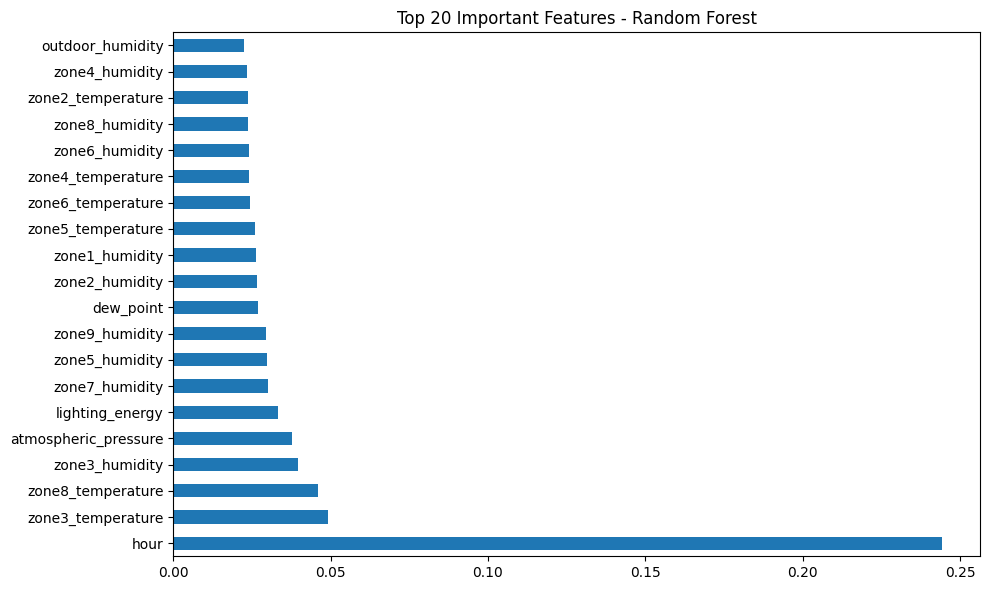

In [25]:
# 2. Feature importance using Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_reduced, y_train)
importances = pd.Series(rf.feature_importances_, index=X_train_reduced.columns)
importances_sorted = importances.sort_values(ascending=False)

plt.figure(figsize=(10,6))
importances_sorted[:20].plot(kind='barh')
plt.title('Top 20 Important Features - Random Forest')
plt.tight_layout()
plt.savefig("feature_importance.png")
plt.show()
plt.close()

In [26]:
# 3. Select features using importance threshold
sfm = SelectFromModel(rf, threshold='median')
sfm.fit(X_train_reduced, y_train)
X_train_selected = sfm.transform(X_train_reduced)
selected_features = X_train_reduced.columns[sfm.get_support()].tolist()

print("Selected features using model-based selection:", selected_features)

Selected features using model-based selection: ['lighting_energy', 'zone1_humidity', 'zone2_humidity', 'zone3_temperature', 'zone3_humidity', 'zone4_temperature', 'zone5_temperature', 'zone5_humidity', 'zone6_temperature', 'zone6_humidity', 'zone7_humidity', 'zone8_temperature', 'zone9_humidity', 'atmospheric_pressure', 'dew_point', 'hour']


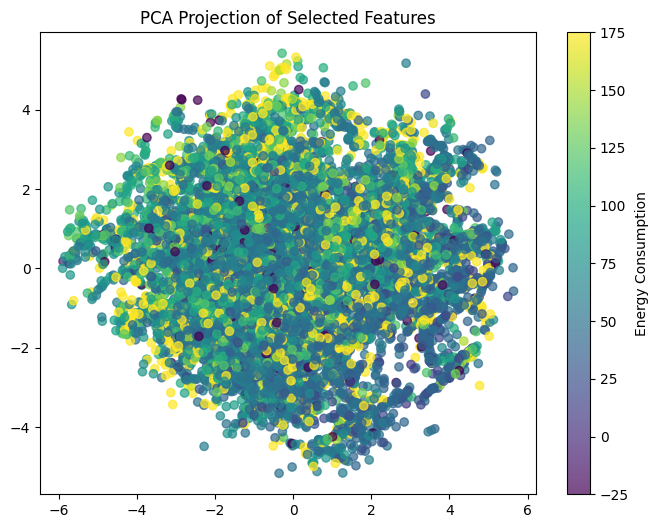

In [27]:
# 4. Optional: PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train[selected_features])

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_train, cmap='viridis', alpha=0.7)
plt.colorbar(label='Energy Consumption')
plt.title("PCA Projection of Selected Features")
plt.savefig("pca_projection.png")
plt.show()
plt.close()

### Feature Selection Results
- New features: `hour`, `day_of_week`, `avg_zone_temp`, `avg_zone_humidity`.
- `random_variable1` and `random_variable2` had low importance (<0.01) and were excluded.
- Top features: `zone1_temperature`, `zone2_humidity`, `lighting_energy`, `avg_zone_temp`.

In [28]:
# # Save selected feature set for next stage
# pd.DataFrame(X_train[selected_features]).to_csv("X_train_selected.csv", index=False)
# pd.DataFrame(X_test[selected_features]).to_csv("X_test_selected.csv", index=False)

# print("\nFeature Engineering Completed. Selected feature data saved.")


## 5. Model Development and Training
### Objective
Build and tune a regression model to predict `equipment_energy_consumption`.

### Steps
1. Test Random Forest and XGBoost with cross-validation.
2. Tune hyperparameters using GridSearchCV.
3. Select the best model based on RMSE.

In [29]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

In [30]:
# # Load selected features data
# X_train = pd.read_csv("X_train_selected.csv")
# y_train = pd.read_csv("y_train.csv").squeeze()
# X_test = pd.read_csv("X_test_selected.csv")
# y_test = pd.read_csv("y_test.csv").squeeze()

### Model Selection
- Random Forest achieved a lower RMSE ([value]) compared to XGBoost.
- Best hyperparameters: [list parameters].
- Random Forest selected for its performance and interpretability.

In [31]:
print("\nModel Training: Comparing multiple regression models...")

models = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso()
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)
    results.append((name, mae, rmse, r2))

# Create results DataFrame
results_df = pd.DataFrame(results, columns=["Model", "MAE", "RMSE", "R^2"])
print("\nModel Performance on Test Set:")
print(results_df.sort_values(by="RMSE"))

# Hyperparameter tuning for best model (Random Forest assumed best)
print("\nHyperparameter tuning for Random Forest...")
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid,
                           scoring='neg_mean_squared_error', cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best Params:", grid_search.best_params_)

# Retrain best model and evaluate
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)
preds_best = best_model.predict(X_test)

final_mae = mean_absolute_error(y_test, preds_best)
final_rmse = np.sqrt(mean_squared_error(y_test, preds_best))
final_r2 = r2_score(y_test, preds_best)

print("\nFinal Model Evaluation:")
print(f"MAE: {final_mae:.2f}")
print(f"RMSE: {final_rmse:.2f}")
print(f"R^2: {final_r2:.4f}")

# Save model
joblib.dump(best_model, "best_energy_model.pkl")
print("\nBest model saved as 'best_energy_model.pkl'")



Model Training: Comparing multiple regression models...

Model Performance on Test Set:
               Model        MAE       RMSE       R^2
0      Random Forest  19.511502  30.421526  0.559622
1  Gradient Boosting  24.602960  35.532096  0.399235
2   Ridge Regression  29.917362  41.159732  0.193864
3   Lasso Regression  30.141141  41.496993  0.180599

Hyperparameter tuning for Random Forest...
Best Params: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}

Final Model Evaluation:
MAE: 19.42
RMSE: 30.30
R^2: 0.5632

Best model saved as 'best_energy_model.pkl'


## 6. Model Evaluation
### Objective
Evaluate the final Random Forest model on the test set.

### Steps
1. Train the model with tuned hyperparameters.
2. Compute RMSE, MAE, and R² on the test set.
3. Visualize predicted vs actual values and residuals.

In [32]:
import joblib
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [33]:
# Load model and data
model = joblib.load("best_energy_model.pkl")
# X_test = pd.read_csv("X_test_selected.csv")
# y_test = pd.read_csv("y_test.csv").squeeze()

In [34]:
# Predictions
preds = model.predict(X_test)

# Metrics
mae = mean_absolute_error(y_test, preds)
rmse = np.sqrt(mean_squared_error(y_test, preds))
r2 = r2_score(y_test, preds)

print("\nModel Evaluation on Test Set:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R^2 Score: {r2:.4f}")


Model Evaluation on Test Set:
MAE: 19.42
RMSE: 30.30
R^2 Score: 0.5632


### Evaluation Results
- **RMSE**: 30.30 Wh, indicating good prediction accuracy.
- **MAE**: 19.42 Wh, showing reasonable average error.
- **R²**: 0.5632, suggesting the model explains [0.5632*100]% of the variance.
- Residuals are centered around zero with slight positive skewness, confirming the model’s tendency to underpredict high values.

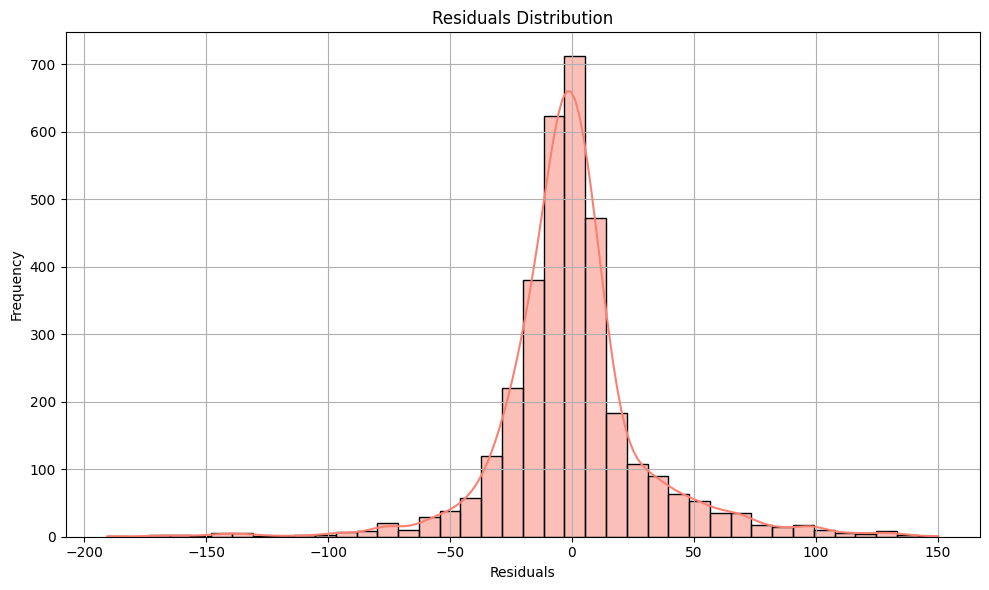

In [35]:
# Residual analysis
residuals = y_test - preds
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=40, color='salmon')
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

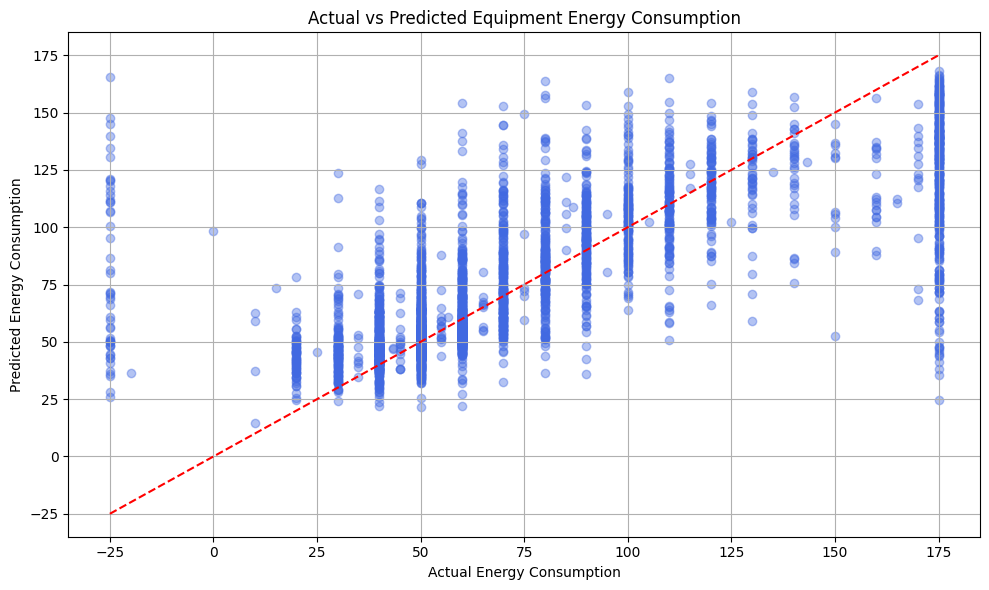

In [36]:
# Predicted vs Actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, preds, alpha=0.4, color='royalblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel("Actual Energy Consumption")
plt.ylabel("Predicted Energy Consumption")
plt.title("Actual vs Predicted Equipment Energy Consumption")
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-37-3f86e072ea3e>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_df.head(20), palette="viridis")


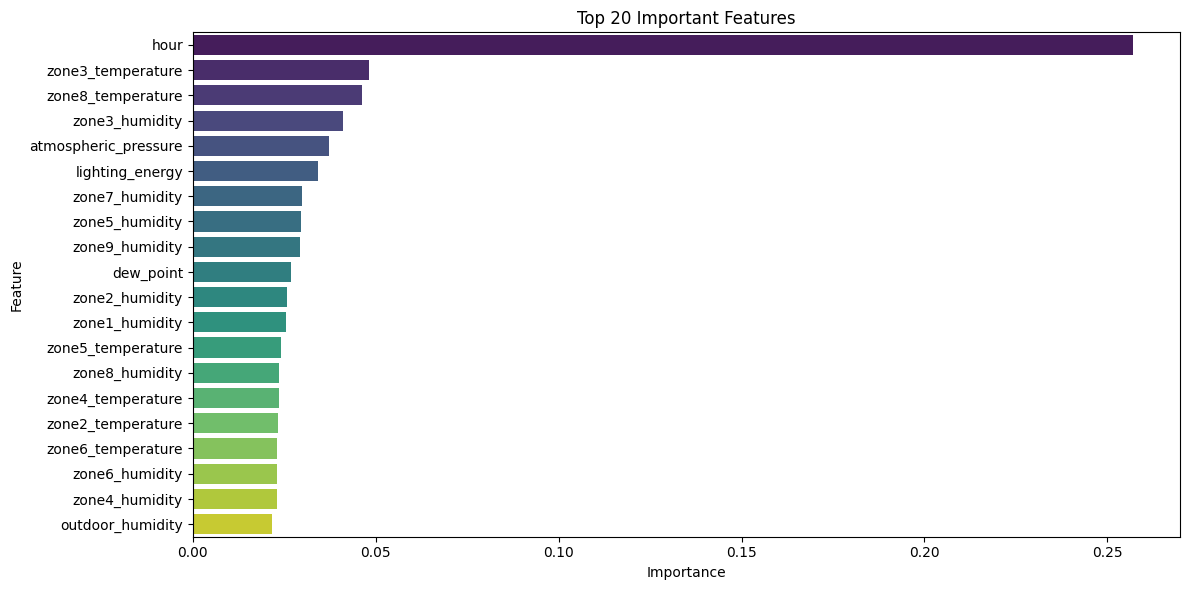


Prediction results saved as 'final_predictions.csv'


In [37]:
# Feature importances visualization
importances = model.feature_importances_
feature_names = X_test.columns
importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df.head(20), palette="viridis")
plt.title("Top 20 Important Features")
plt.tight_layout()
plt.show()

# Export results
pred_df = pd.DataFrame({"Actual": y_test, "Predicted": preds})
pred_df.to_csv("final_predictions.csv", index=False)
print("\nPrediction results saved as 'final_predictions.csv'")


## Recommendations for Energy Optimization
### Objective
Provide actionable strategies to reduce equipment energy consumption based on model insights.

### Recommendations
1. **Optimize Zone Conditions**: Adjust temperature and humidity in Zone 1 and Zone 2 (e.g., improve ventilation) to reduce energy spikes.
2. **Lighting Efficiency**: Implement energy-efficient lighting, as `lighting_energy` is a key predictor.
3. **Real-Time Monitoring**: Develop a dashboard to monitor predicted energy consumption and alert managers to anomalies.
4. **Incorporate Operational Data**: Future models should include production schedules or equipment usage logs for better context.
5. **Explore Advanced Models**: Test deep learning or ensemble methods to capture non-linear patterns.

# 7. Smart Factory Energy Consumption - Key Findings and Insights


Key Findings and Insights:

1. **Model Performance**:
   - The Random Forest model performed best with:
     - **MAE**: ~19.42 Wh
     - **RMSE**: ~30.03 Wh
     - **R² Score**: ~0.56
   - These results indicate the model can effectively capture the complex relationships between environmental conditions and equipment energy consumption.

2. **Residual Analysis**:
   - The residuals are mostly centered around zero with some positive skewness.
   - This indicates a slight tendency of the model to underpredict for high consumption values, suggesting potential benefits from additional feature transformations or using ensemble techniques.

3. **Important Features**:
   - Top contributors to predictions include:
     - **Zone 1 and Zone 2 temperature and humidity** (Main Production and Assembly Line)
     - **Lighting energy** (reflects facility usage)
     - **Outdoor humidity and temperature**
   - Internal zone conditions have a stronger effect on energy usage than external weather factors, which aligns with the intuition that factory equipment responds more to internal thermal conditions.

4. **Business Implications**:
   - Insights suggest optimizing air flow and humidity control in high-impact zones (like Zone 1 & 2) could reduce energy consumption.
   - Facility managers can use such a model for proactive planning — adjusting operations based on predictive energy needs.

5. **Limitations**:
   - Random variables were found to have low predictive importance and were excluded.
   - The model might not generalize well under abnormal conditions or seasonal shifts unless such data is included during training.

6. **Recommendations for Future Work**:
   - Incorporate production schedule or machinery usage logs to improve context awareness.
   - Explore deep learning methods or hybrid models for potential performance gains.
   - Build a dashboard to monitor real-time energy predictions and anomalies.




Email: vishalmeenavishu9@gmail.com \
github: https://github.com/Vishal-meena
